#### Loading of libraries for Telco Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
telco = pd.read_csv('D:/Subhradeep/Dataset/DC/Telco_Churn.csv')

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


<b>Note:</b> 
    
    Churn, Intl_Plan, Vmail_Plan, State are of type Object which is categorical. 
    We will convert them into numerical later on our notebook in the Data Preprocessing Steps.

In [4]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


#### Checking for Statistics of Telco Data

In [5]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


<b>Observation:</b>
    
    Intl_Calls and Night_Mins are not in same Scale. 
    We need to take care of this two in the data preprocessing steps, so as to bring them in same scale

#### Checking Total number of Churn in the dataset of telco, 

Yes-Churn

No-Non Churners

In [6]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [7]:
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


In [8]:
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


#### Observation :
    
    From the above analysis, churners customer makes more service calls than non churners. 
    Let's analyze further to understand. We will aggregate on State Column and try to find out the Custoer Churn

In [9]:
pd.DataFrame(telco.groupby('State')['Churn'].value_counts())

Churn
State Churn       
AK    no        49
      yes        3
AL    no        72
      yes        8
AR    no        44
...            ...
WI    yes        7
WV    no        96
      yes       10
WY    no        68
      yes        9

[102 rows x 1 columns]

### Data Visulaization to check the data distribution of Calls  using seaborn

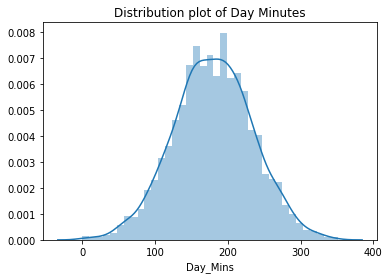

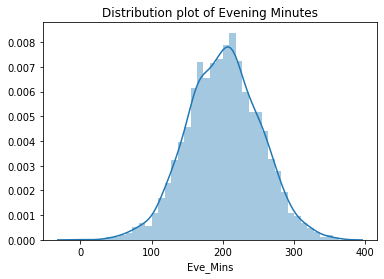

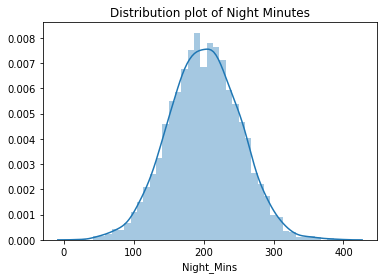

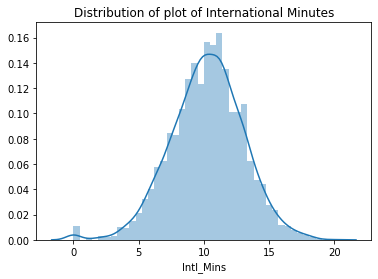

In [10]:
sns.distplot(telco['Day_Mins'])
plt.title('Distribution plot of Day Minutes')
plt.show()

sns.distplot(telco['Eve_Mins'])
plt.title('Distribution plot of Evening Minutes')
plt.show()

sns.distplot(telco['Night_Mins'])
plt.title('Distribution plot of Night Minutes')
plt.show()

sns.distplot(telco['Intl_Mins'])
plt.title('Distribution of plot of International Minutes')
plt.show()

#### Visualization of Account_length

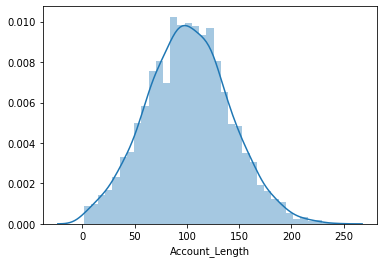

In [11]:
#First we will see the distribution of the account lengths

sns.distplot(telco['Account_Length'])
plt.show()

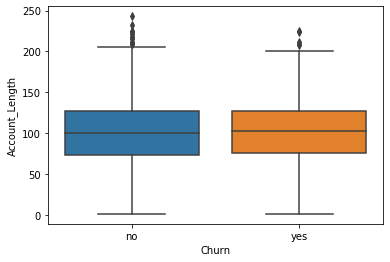

In [12]:
#Lets now see for the churn in respect to the Account Lengths

sns.boxplot(x='Churn',y='Account_Length',data=telco)
plt.show()

<b>Observation:</b> No significant difference in respect to churn and Account Lengths. Also there can be few outliers which we can see from the box plot above.Let's analyze for the number of customer Service Calls.

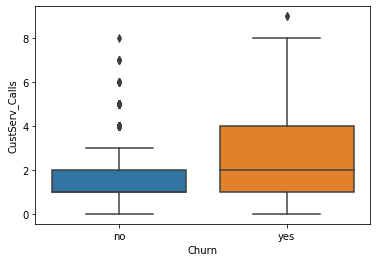

In [13]:
sns.boxplot(x='Churn',y='CustServ_Calls',data=telco)
plt.show()

<b>Observation:-</b>
    
    There are few outliers which we can see in the above plot and there is a significant difference in respect to Churn and Customer Service calls.
    We will now remove the outliers using
    
    sym=''------> removing the outliers in the visualization
    hue   ------> adding third variable for Voice Mail Plan/International Plan

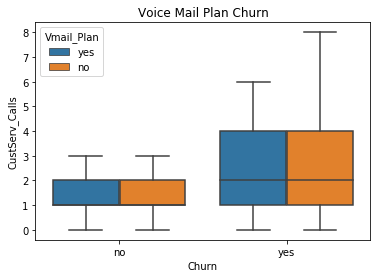

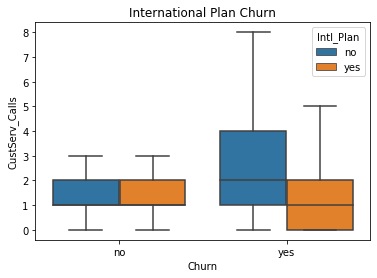

In [14]:
plt.title('Voice Mail Plan Churn')
sns.boxplot(x='Churn',y='CustServ_Calls',data=telco,sym='',hue='Vmail_Plan')
plt.show()

plt.title('International Plan Churn')
sns.boxplot(x='Churn',y='CustServ_Calls',data=telco,sym='',hue='Intl_Plan')
plt.show()


<b>Observation:-</b> 
    
    No difference in the above voice Mail plan, so we plotted the International Plan as our third Variable. 
    It is quite interesting to see that customers who do churn end up leaving more customer service calls, 
    unless these customers also have an international plan, in which case they leave fewer customer service calls.

#### Preprocessing the data for Model 

Handing the Categorical data using replace and get dummies

In [15]:
#Using Replace to substitute yes with 1 and no with 0
#Vmail_Plan and Churn are two 

telco['Churn'] = telco['Churn'].replace({'no':0,'yes':1})
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1}) 

#State--> pd.get_dummies for One Hot Encoding

telco_state = pd.get_dummies(telco['State'])


#### Scaling the Columns:

        Intl_Calls and Night_Mins needs to be scaled


In [16]:
from sklearn.preprocessing import StandardScaler

telco_sc = StandardScaler()
telco_scaled_df = pd.DataFrame(telco_sc.fit_transform(telco.loc[:,['Intl_Calls','Night_Mins']]))

In [17]:
telco_scaled_df.describe()

,0,1
count,3.333000e+03,3.333000e+03
mean,-1.264615e-16,6.602046e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


#### Dropping unnecessary feature:
    
    Area_Code & Phone is being dropped.

In [18]:
telco = telco.drop(telco[['Area_Code','Phone','State']],axis=1)

In [19]:
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')

#### Feature Engineering:
    
    Average Night calls needs to be derived based on Night Mins and Night Calls

In [20]:
telco['Average_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']
telco['Average_Night_Calls'].head()

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Average_Night_Calls, dtype: float64

#### Churn Prediction

Score of Random Forest Churn Model is: 0.951
Precision Matrix 0.9038461538461539
Recall Score 0.706766917293233
Confusion Metrics
[[857  10]
 [ 39  94]]


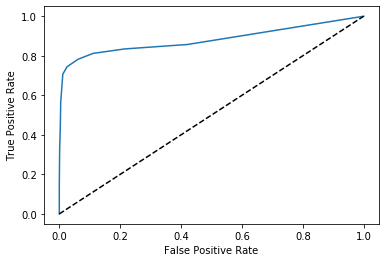

In [21]:
telco.drop('Average_Night_Calls',axis=1)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,confusion_matrix,recall_score,roc_curve

X = telco.drop('Churn',axis=1)
y = telco['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Score of Random Forest Churn Model is:',clf.score(X_test,y_test))
print('Precision Matrix',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('Confusion Metrics')
print(confusion_matrix(y_test,y_pred))
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()



#### F1 Score:
There's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

2 * (precision * recall) / (precision + recall)

In [22]:
from sklearn.metrics import roc_auc_score,f1_score
print('ROC Auc Score is',roc_auc_score(y_test,y_pred_proba))
print('F1 Score',f1_score(y_test,y_pred))

ROC Auc Score is 0.8807485842634267
F1 Score 0.7932489451476793


#### Model Tuning

In [23]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features':['auto','sqrt','log2']}
grid_search_cv = GridSearchCV(clf,param_grid)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)



{'max_features': 'auto'}
Wall time: 668 ms


#### <b>Observation: </b>
    
    We took GridSearchCv for choosing the best parameter and found log2 is the best parameter for max_features. 
    By default it takes sqrt as parameter. 
    Now we will tune other hyperparameter too to check the best parameters values.

In [24]:
%%time
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search_cv = GridSearchCV(clf,param_grid)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10}
Wall time: 5.24 s


<b>Randomized Search CV:</b>
    
    As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, 
    instead of trying out every single combination of values, we could randomly jump around the grid 
    and try different combinations.There's a small possibility we may miss the best combination, but 
    we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In scikit-learn, you can do this using <b>RandomizedSearchCV</b>. It has the same API as GridSearchCV, except that you need to 
specify a parameter distribution that it can sample from instead of specific hyperparameter values.


In [27]:
%%time

from sklearn.model_selection import RandomizedSearchCV

param = {"max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

random_search_cv = RandomizedSearchCV(clf,param)
random_search_cv.fit(X,y)
print('Best Parameter for Randomized Search CV',random_search_cv.best_params_)

Best Parameter for Randomized Search CV {'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
Wall time: 1.62 s


<b>Feature Importances Using Random Search</b>

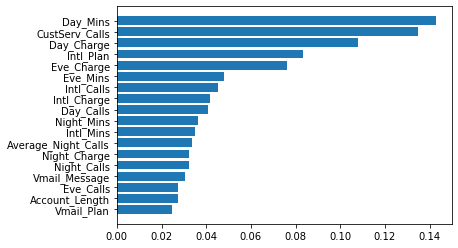

In [38]:
sorted_index = np.argsort(clf.feature_importances_)
labels = X.columns[sorted_index]
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()


#### Summary: 
    
    This is a <b>Startup</b> notebook for telecom churn/retention. The dataset was imbalanced and we need to 
    balance the dataset before splitting the dataset into train and test. 